# Overview of Today's Class

* More on `Seaborn` visualization package
* Examples on predictive models:
    * Regression
    * Classification and decision boundaries

# Visualization with `seaborn`

## Import the core library

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Distribution of Data

* All about penguins: [[link](https://seaworld.org/animals/all-about/penguins/physical-characteristics/#:~:text=Flippers,modified%20into%20paddle%2Dlike%20flippers.&text=Each%20flipper%20is%20covered%20with,tapered%2C%20flattened%20flippers%20for%20swimming.)]

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [3]:
type(penguins)

pandas.core.frame.DataFrame

In [4]:
penguins.shape

(344, 7)

In [5]:
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [6]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### Single variable distribution

/Users/xyin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

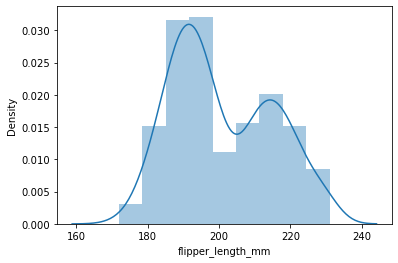

In [7]:
sns.distplot(penguins.flipper_length_mm)

/Users/xyin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='flipper_length_mm'>

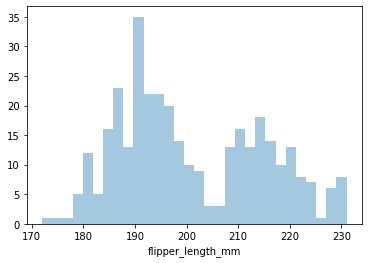

In [8]:
sns.distplot(penguins.flipper_length_mm, kde=False, bins=30)

### Multi-variable joint distribution

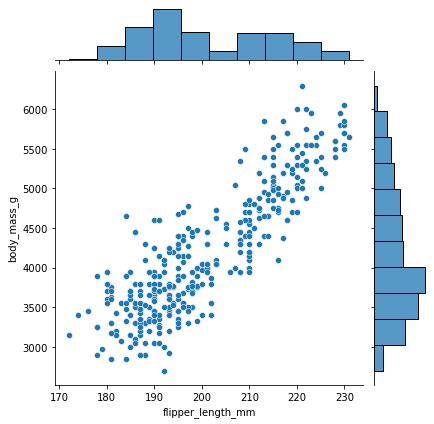

In [9]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,kind='scatter')

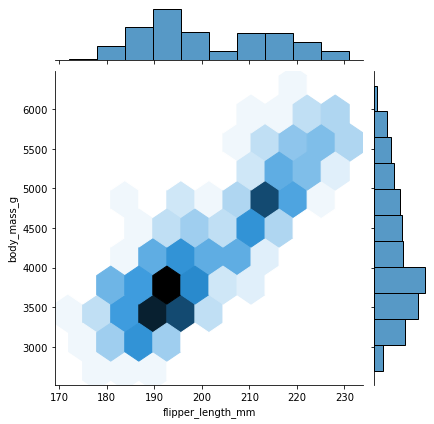

In [10]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,kind='hex')

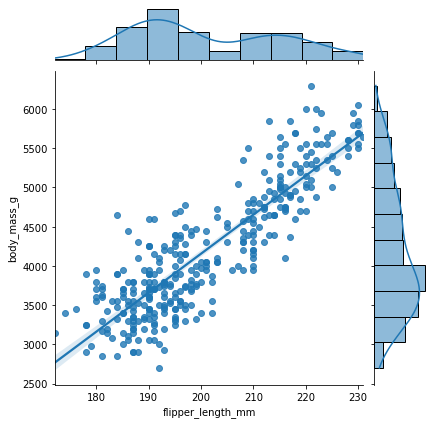

In [10]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,kind='reg')

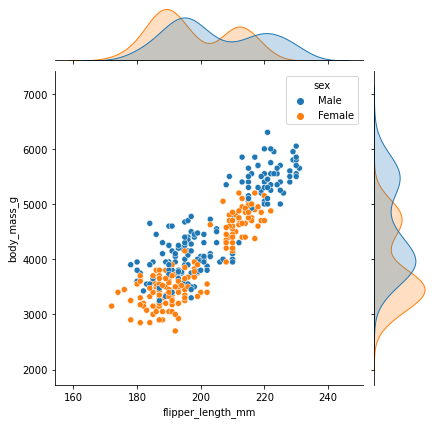

In [12]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex')

### Pair Plot

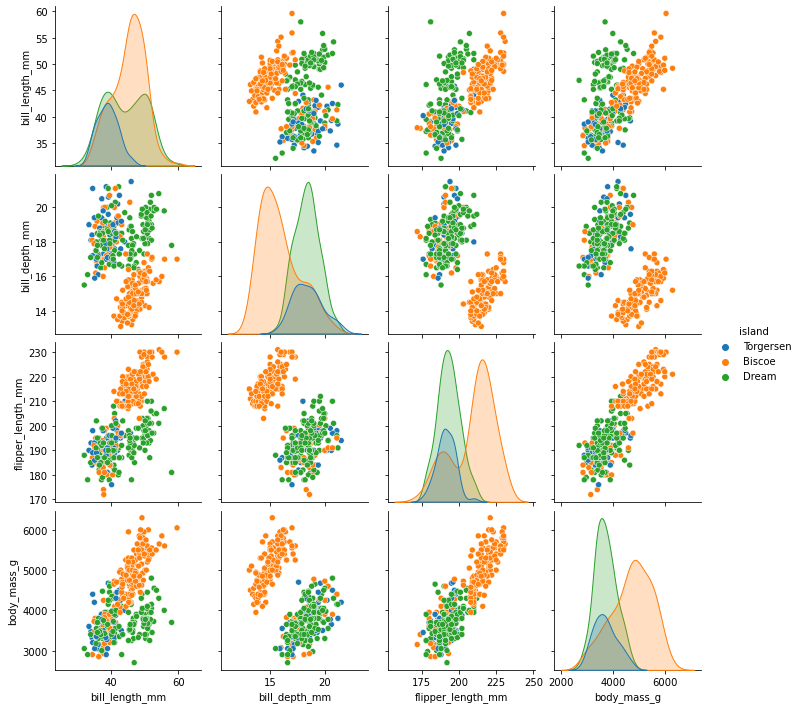

In [15]:
sns.pairplot(penguins, hue='island')
# sns.pairplot(penguins)

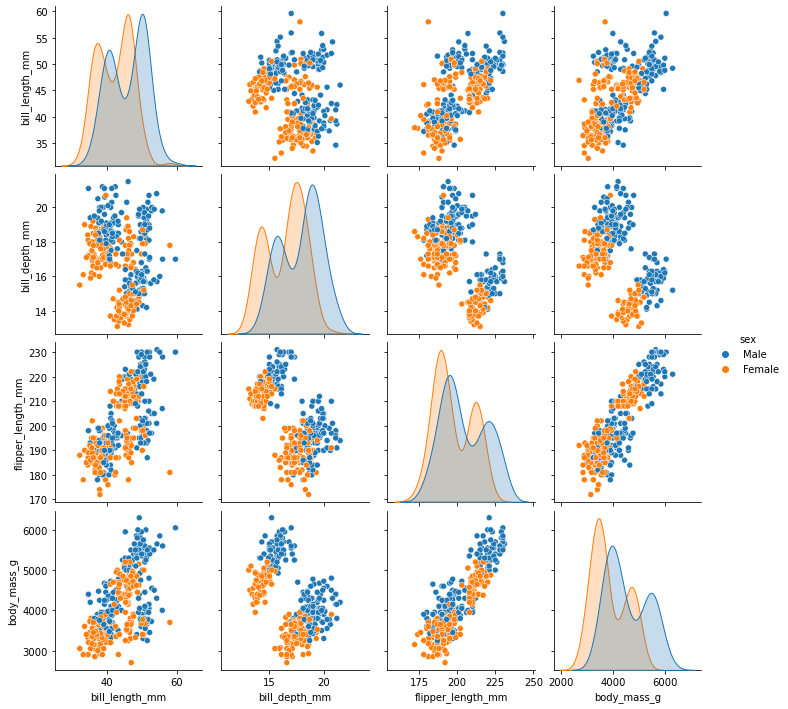

In [13]:
sns.pairplot(penguins, hue='sex')

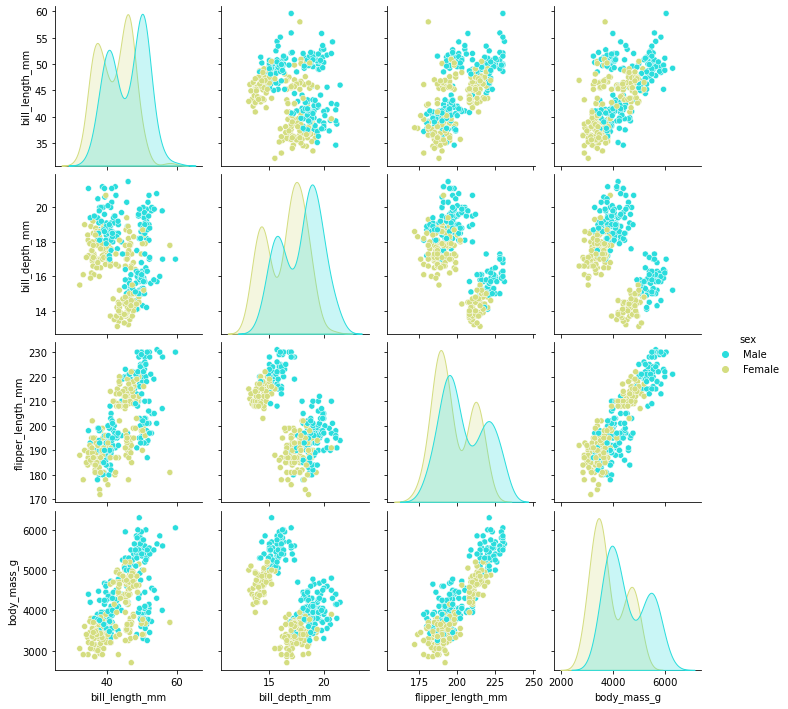

In [14]:
sns.pairplot(penguins, hue='sex',palette='rainbow')

### barplot and countplot

* `Barplot` shows point estimates and confidence intervals as rectangular bars. By default, it displays the mean value. You could also pass in a customized function
* Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

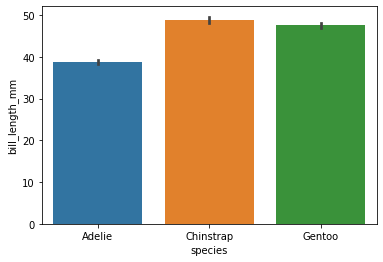

In [16]:
sns.barplot(x='species',y='bill_length_mm',data=penguins) # by default it displays the mean values

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

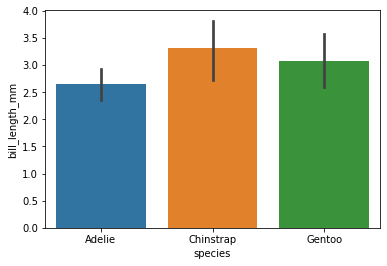

In [17]:
sns.barplot(x='species',y='bill_length_mm',data=penguins,estimator=np.std)

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

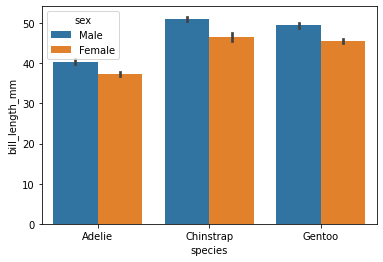

In [18]:
sns.barplot(x='species',y='bill_length_mm',data=penguins,hue='sex')

* `Countplot` shows the counts of observations in each categorical bin using bars.

<AxesSubplot:xlabel='island', ylabel='count'>

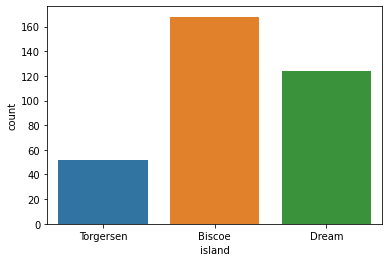

In [19]:
sns.countplot(x='island',data=penguins)

### Boxplot/Violionplot/Stripplot

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

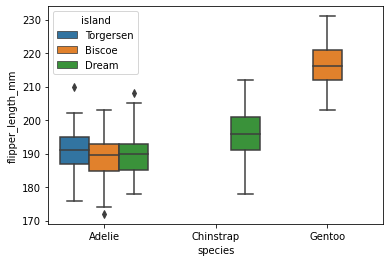

In [21]:
# sns.boxplot(x='species',y='flipper_length_mm',data=penguins)
sns.boxplot(x='species',y='flipper_length_mm',data=penguins,hue='island')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='species'>

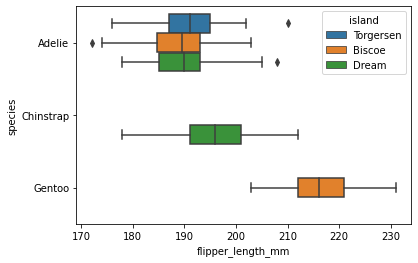

In [22]:
sns.boxplot(y='species',x='flipper_length_mm',data=penguins,hue='island',orient='h')

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

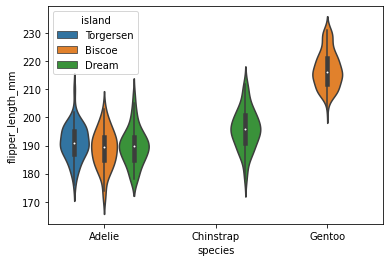

In [23]:
sns.violinplot(x='species',y='flipper_length_mm',data=penguins,hue='island')

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

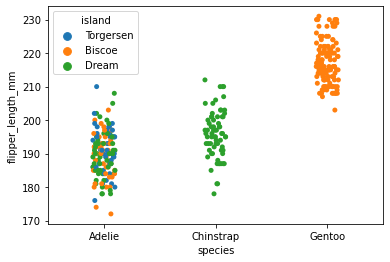

In [24]:
sns.stripplot(x='species',y='flipper_length_mm',data=penguins,hue='island')

In [24]:
# a more general format

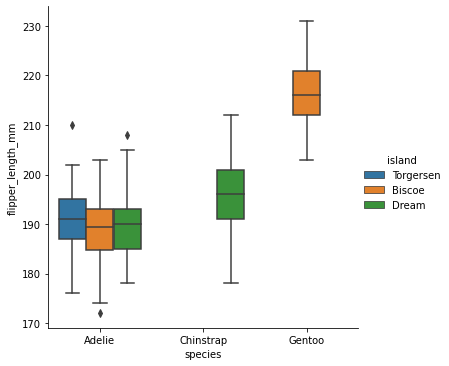

In [25]:
sns.catplot(x='species',y='flipper_length_mm',data=penguins,hue='island',kind='box')

## Heatmap

<AxesSubplot:>

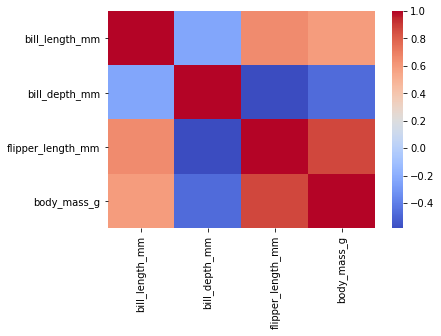

In [26]:
sns.heatmap(penguins.corr(),cmap='coolwarm')

In [27]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

## Grids

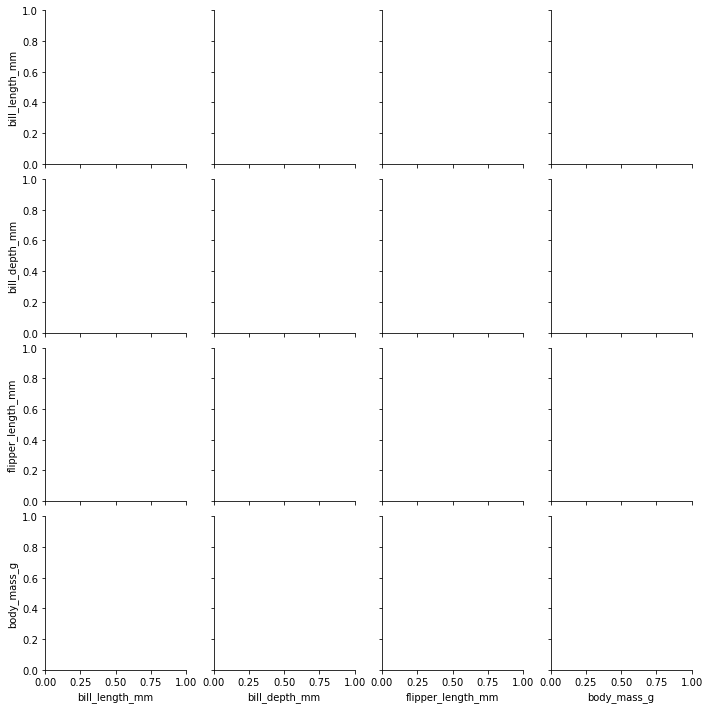

In [27]:
sns.PairGrid(penguins)

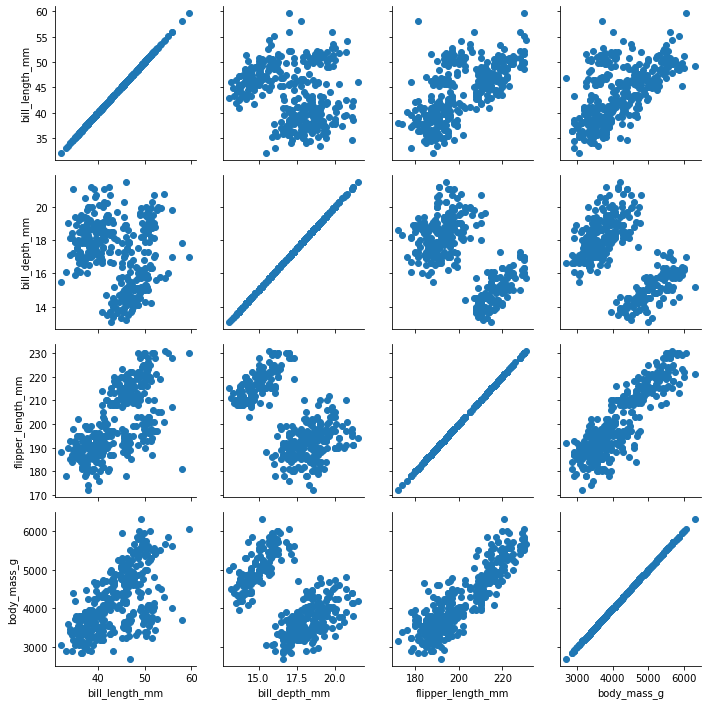

In [28]:
g = sns.PairGrid(penguins)
g.map(plt.scatter)

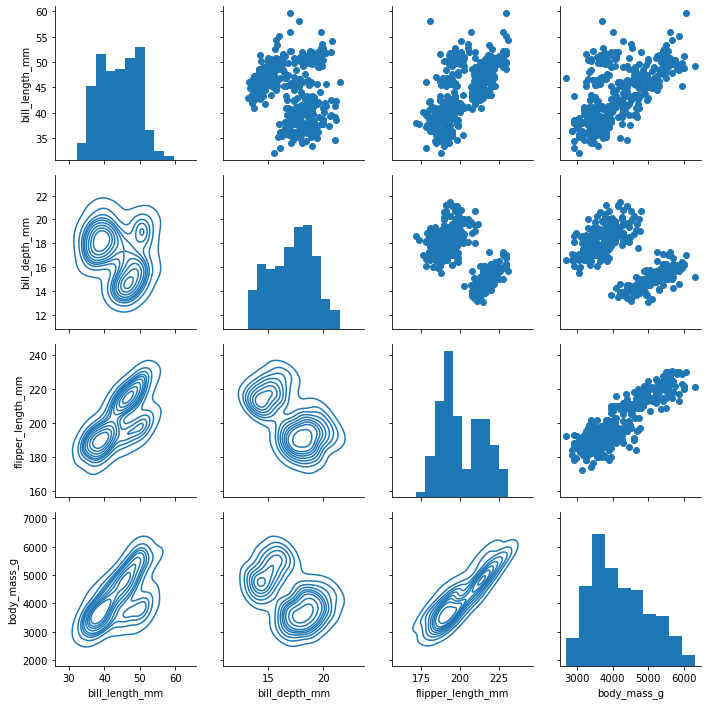

In [29]:
g = sns.PairGrid(penguins)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

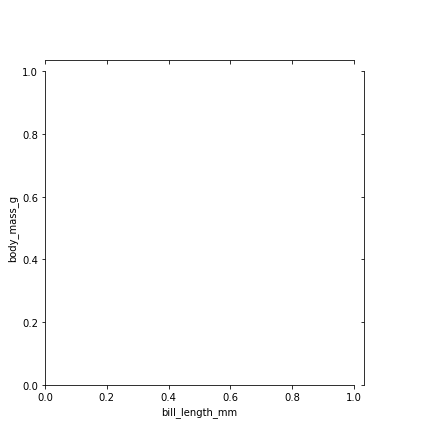

In [30]:
g = sns.JointGrid(x="bill_length_mm", y="body_mass_g", data=penguins)

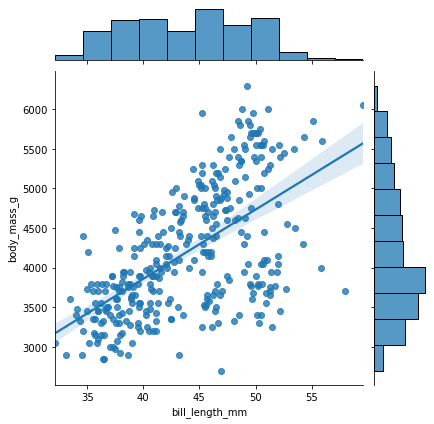

In [31]:
g = sns.JointGrid(x="bill_length_mm", y="body_mass_g", data=penguins)
g = g.plot(sns.regplot, sns.histplot)

## Regression Plot

* Reference: https://seaborn.pydata.org/tutorial/regression.html

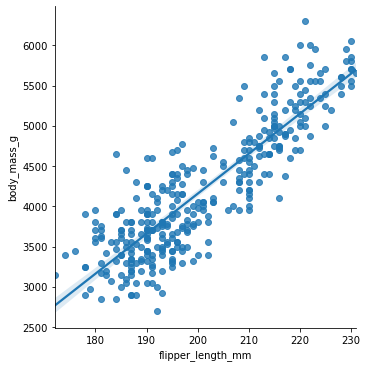

In [32]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,)

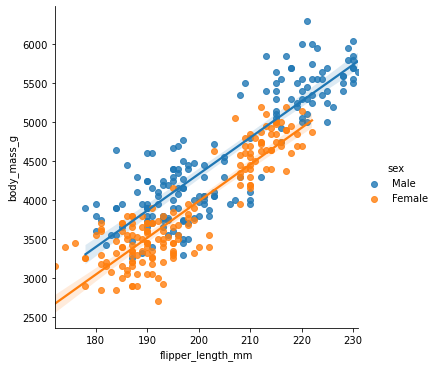

In [33]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex')

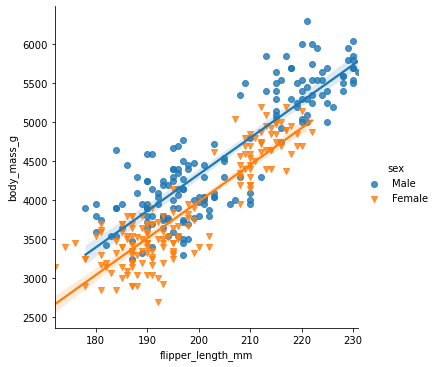

In [34]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex',markers=['o','v'])

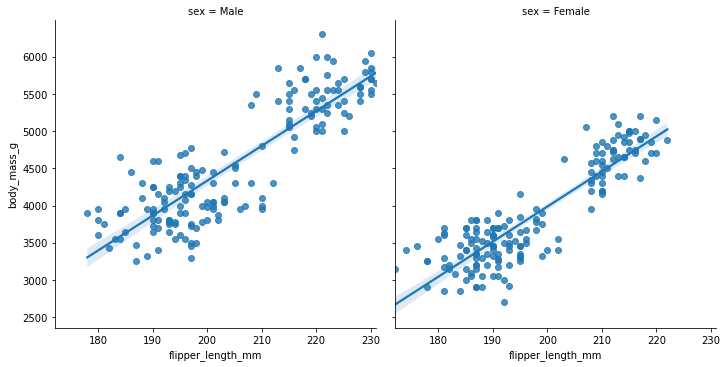

In [35]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,col='sex')

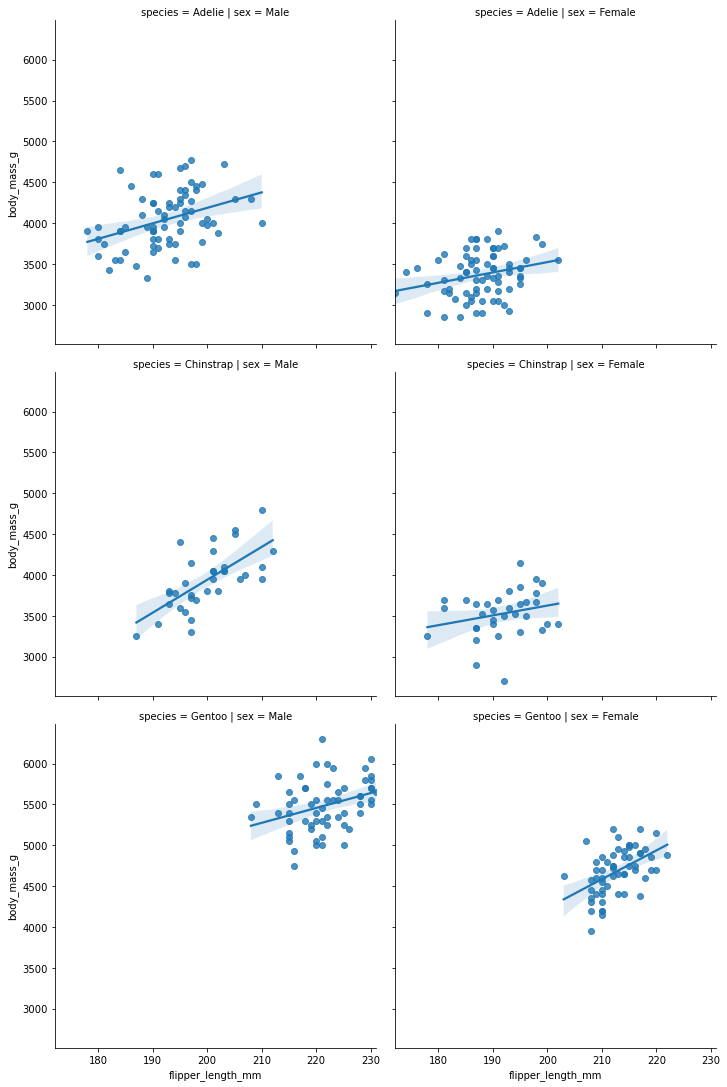

In [36]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,col='sex',row='species')

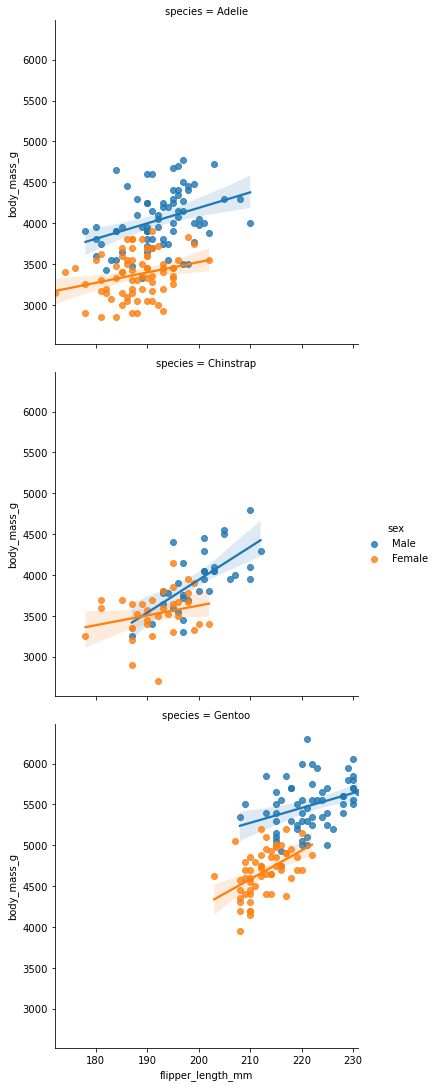

In [37]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex',row='species')

## Colors and Styles

Reference: `matplotlib` colormap: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

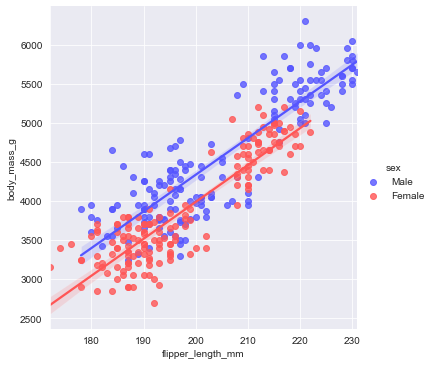

In [39]:
sns.set_style(style='darkgrid')
# sns.set_context('notebook',font_scale=1)
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex',palette='seismic')

# Appendix I: Visualization with `plotly`

* Getting Started with Plotly in Python: https://plotly.com/python/getting-started/

# Appendix II: Visulization with `bokeh`

* Bokeh documentation: https://docs.bokeh.org/en/latest/index.html
    * Quick tutorial: [[link](https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb)]

# Linear Regression

Suppose you want to know **if money makes people happy**, so you download the Better Life Index data from the OECD’s website and stats about gross domestic product (GDP) per capita from the IMF’s website.
* OECD: https://stats.oecd.org/index.aspx?DataSetCode=BLI
* IMF: https://www.imf.org/en/Publications/SPROLLs/world-economic-outlook-databases#sort=%40imfdate%20descending

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

## Get the data

In [40]:
oecd_bli = pd.read_csv('oecd-better-life-index.csv',sep=',',header=0)
gdp_per_capita = pd.read_csv('imf-gdp-per-capita.csv',sep=',',header=0,thousands=',')

In [41]:
oecd_bli.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN


In [42]:
gdp_per_capita.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0


## Transform the data

Get the view of 

| Country | GDP per capita (USD) | Life satisfaction |
|---------|----------------------|-------------------|

### format the oecd data

In [43]:
oecd_bli.Indicator.unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [44]:
oecd_bli.Inequality.unique()

array(['Total', 'Men', 'Women', 'High', 'Low'], dtype=object)

In [45]:
oecd_bli2 = oecd_bli.loc[
    (oecd_bli.Inequality=='Total')&(oecd_bli.Indicator=='Life satisfaction'),
    ['Country','Value']
].rename(columns={'Country':'country','Value':'life_satisfaction'})

In [46]:
oecd_bli2.head(3)

,country,life_satisfaction
1813,Australia,7.3
1814,Austria,7.1
1815,Belgium,6.9


In [47]:
oecd_bli2.country.nunique()

41

### format the gdp per capita data

In [48]:
gdp_per_capita2 = gdp_per_capita.loc[:,['Country','2015']].rename(columns={
    'Country':'country',
    '2015':'gdp_per_capita'
})
gdp_per_capita2.head(3)

,country,gdp_per_capita
0,Afghanistan,599.994
1,Albania,3995.380
2,Algeria,4318.140


In [49]:
gdp_per_capita2.country.nunique()

189

### join the two

In [50]:
country_stats = pd.merge(
    gdp_per_capita2,
    oecd_bli2,
    on='country'
).sort_values(by='gdp_per_capita').reset_index(drop=True)

In [51]:
country_stats.head(3)

,country,gdp_per_capita,life_satisfaction
0,South Africa,5694.57,4.7
1,Colombia,6083.51,6.3
2,Brazil,8670.00,6.4


In [52]:
country_stats.shape

(40, 3)

## split the data

In [53]:
# remove_indices = [2,3,8,12,37,38,39]
# keep_indices = list(set(range(40)) - set(remove_indices))

countries_remove = ['Brazil','Mexico','Chile','Czech Republic','Norway','Switzerland','Luxembourg']
countries_keep = set(country_stats.country) - set(countries_remove)

In [54]:
# sample_data = country_stats.iloc[keep_indices]
# missing_data = country_stats.iloc[remove_indices]
sample_data = country_stats[country_stats.country.isin(countries_keep)]
missing_data = country_stats[country_stats.country.isin(countries_remove)]

In [55]:
missing_data

,country,gdp_per_capita,life_satisfaction
2,Brazil,8670.00,6.4
3,Mexico,9009.28,6.5
8,Chile,13340.91,6.5
12,Czech Republic,17256.92,6.7
37,Norway,74822.11,7.6
38,Switzerland,80675.31,7.5
39,Luxembourg,101994.09,6.9


## visualize the sample data

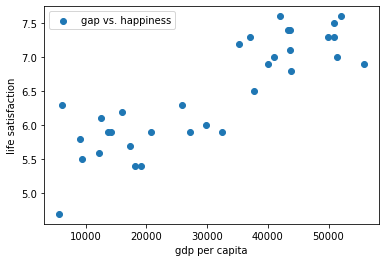

In [58]:
plt.scatter(sample_data.gdp_per_capita, sample_data.life_satisfaction, label = 'gap vs. happiness')
plt.xlabel('gdp per capita')
plt.ylabel('life satisfaction')
plt.legend()

plt.show()

In [59]:
sample_data[sample_data.country.isin(['Hungary','Korea','France','Australia','United States'])]

,country,gdp_per_capita,life_satisfaction
6,Hungary,12239.89,5.6
18,Korea,27195.20,5.9
23,France,37675.01,6.5
33,Australia,50961.87,7.3
36,United States,55805.20,6.9


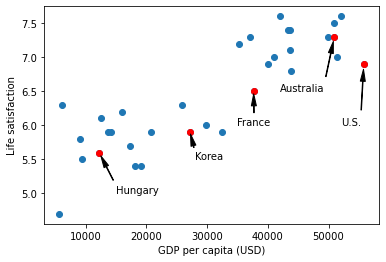

In [60]:
plt.scatter(sample_data.gdp_per_capita, sample_data.life_satisfaction)
position_text = {
    "Hungary": (15000, 5),
    "Korea": (28000, 5.5),
    "France": (35000, 6.0),
    "Australia": (42000, 6.5),
    "United States": (52000, 6.0),
}

for country, pos_text in position_text.items():
    pos_data_x = sample_data.loc[sample_data.country==country,'gdp_per_capita']
    pos_data_y = sample_data.loc[sample_data.country==country,'life_satisfaction']
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.show()

There seems to be a linear trend here!!

## Fit a linear regression model!

Linear regression model
$$
y = \theta_0 + \theta_1X
$$

The fit essentially minimized the Sum of Squared Errors (SSE)
$$
SSE = \sum_{i=1}^{N} (y_i - \hat{y_i})^2 = \sum_{i=1}^{N} (y_i - \theta_0 - \theta_1X_i)^2
$$
Or, in the matrix form
$$
SSE = ||y - Xw||^2
$$

![](https://nextjournal.com/data/QmfPuPp4V74FyvTTojMj6ix9T8Skj1ji4GhX5Pr6zK8w4N?filename=linear-regression.png&content-type=image/png)

In [63]:
%%time

from sklearn import linear_model
lr = linear_model.LinearRegression()

# prepare the data
Xsample = np.c_[sample_data.gdp_per_capita]
ysample = np.c_[sample_data.life_satisfaction]

# train the model
lr.fit(Xsample, ysample)

# get the model parameters
# t0, t1 = lr.intercept_[0], lr.coef_[0][0]
t0 = lr.intercept_[0]
t1 = lr.coef_[0][0]

t0, t1

CPU times: user 937 µs, sys: 87 µs, total: 1.02 ms
Wall time: 1.05 ms


(5.166394143672077, 4.247060194254787e-05)

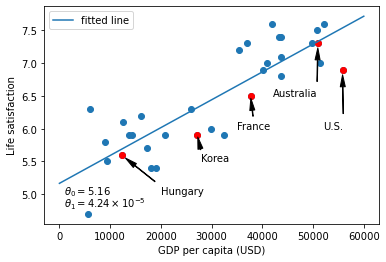

In [64]:
## same as previous plot
plt.scatter(sample_data.gdp_per_capita, sample_data.life_satisfaction)
position_text = {
    "Hungary": (20000, 5),
    "Korea": (28000, 5.5),
    "France": (35000, 6.0),
    "Australia": (42000, 6.5),
    "United States": (52000, 6.0),
}

for country, pos_text in position_text.items():
    pos_data_x = sample_data.loc[sample_data.country==country,'gdp_per_capita']
    pos_data_y = sample_data.loc[sample_data.country==country,'life_satisfaction']
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

## plot the fitted line here
X = np.linspace(start=0, stop=60000, num=1000)
plt.plot(X, t1*X + t0, label='fitted line')
plt.text(1000, 5, '$\\theta_0=5.16$')
plt.text(1000, 4.8, '$\\theta_1=4.24 \\times 10^{-5}$')
    
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.legend()
plt.show()

## Make predictions to a new country

In [62]:
gdp_per_capita2[gdp_per_capita2.country=='Cyprus']

,country,gdp_per_capita
42,Cyprus,22587.49


In [65]:
X_new = [[22587.49]]
lr.predict(X_new)

array([[6.12569844]])

In [64]:
gdp_per_capita2[gdp_per_capita2.country=='China']

,country,gdp_per_capita
34,China,7989.72


In [65]:
X_new = [[7989.72]]
lr.predict(X_new)

array([[5.50572236]])

## What happens when we add the missing countries back to the data?

In [66]:
missing_data

,country,gdp_per_capita,life_satisfaction
2,Brazil,8670.00,6.4
3,Mexico,9009.28,6.5
8,Chile,13340.91,6.5
12,Czech Republic,17256.92,6.7
37,Norway,74822.11,7.6
38,Switzerland,80675.31,7.5
39,Luxembourg,101994.09,6.9


In [67]:
%%time

lr2 = linear_model.LinearRegression()

# prepare the data
Xfull = np.c_[country_stats.gdp_per_capita]
yfull = np.c_[country_stats.life_satisfaction]

# train the model
lr2.fit(Xfull, yfull)

# get the model parameters
t0full, t1full = lr2.intercept_[0], lr2.coef_[0][0]
t0full, t1full

CPU times: user 835 µs, sys: 88 µs, total: 923 µs
Wall time: 875 µs


(5.72408173931895, 2.4690442763171645e-05)

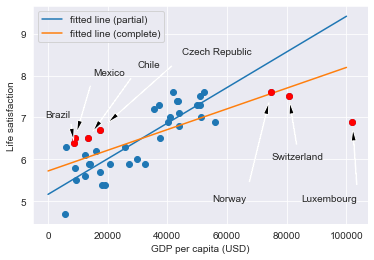

In [68]:
## same as previous plot
plt.scatter(country_stats.gdp_per_capita, country_stats.life_satisfaction)

X = np.linspace(start=0, stop=100000, num=1000)

## plot the fitted line based on partial dataset
plt.plot(X, t1*X + t0, label='fitted line (partial)')

## plot the fitted line of the complete dataset
plt.plot(X, t1full*X + t0full, label='fitted line (complete)')

## highlight the countries from the missing data
position_text2 = {
    "Brazil": (-1000, 7),
    "Mexico": (15000, 8),
    "Chile": (30000, 8.2),
    "Czech Republic": (45000, 8.5),
    "Norway": (55000, 5),
    "Switzerland": (75000, 6),
    "Luxembourg": (85000, 5)
}

for country, pos_text in position_text2.items():
    pos_data_x = country_stats.loc[country_stats.country==country,'gdp_per_capita']
    pos_data_y = country_stats.loc[country_stats.country==country,'life_satisfaction']
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.legend()
plt.show()

Apparently, the previous training data `sample_data` we used isn't representative!!

## Overfitting

In [69]:
## add polynomial features
from sklearn import preprocessing

df = 10
poly = preprocessing.PolynomialFeatures(degree=df)
scaler = preprocessing.StandardScaler()
lr3 = linear_model.LinearRegression()

Xfull_new = scaler.fit_transform(
    poly.fit_transform(Xfull)
)

## fit linear regression model on Xfull_new
lr3.fit(Xfull_new,yfull)

LinearRegression()

In [70]:
## define a set of new X
X = np.c_[np.linspace(start=0, stop=100000, num=1000)]

X_new = scaler.fit_transform(
    poly.fit_transform(X)
)

## predict on the new X
y = lr3.predict(X_new)

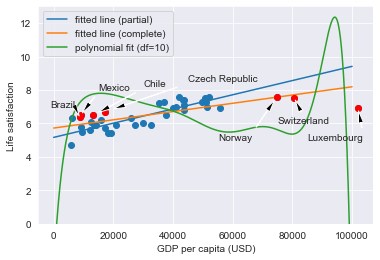

In [71]:
plt.scatter(country_stats.gdp_per_capita, country_stats.life_satisfaction)

## plot the fitted line based on partial dataset
plt.plot(X, t1*X + t0, label='fitted line (partial)')

## plot the fitted line of the complete dataset
plt.plot(X, t1full*X + t0full, label='fitted line (complete)')

## highlight the countries from the missing data
position_text2 = {
    "Brazil": (-1000, 7),
    "Mexico": (15000, 8),
    "Chile": (30000, 8.2),
    "Czech Republic": (45000, 8.5),
    "Norway": (55000, 5),
    "Switzerland": (75000, 6),
    "Luxembourg": (85000, 5)
}

for country, pos_text in position_text2.items():
    pos_data_x = country_stats.loc[country_stats.country==country,'gdp_per_capita']
    pos_data_y = country_stats.loc[country_stats.country==country,'life_satisfaction']
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

## plot the polynomial fit
plt.plot(X,y,label='polynomial fit (df={})'.format(df))
    
    
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.ylim(0,13)
plt.legend()
plt.show()

## Apply L2 Regularization (Ridge Regression)

Instead of minimizing
$$
SSE = ||y - Xw||^2
$$

We will minimize
$$
SSE = ||y - Xw||^2 + \alpha ||w||^2
$$

In the 2D situation

$$
SSE = ||y - Xw||^2 + \alpha ||w||^2 = \sum_{i=1}^{N} (y_i - \theta_0 - \theta_1X_i)^2 + \alpha (\theta_0^2 + \theta_1^2)
$$

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* There is another kind of regularization called `L1 Regularization` (also called `Lasso Regression`)
    * More details can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
    * Aur´elien G´eron `Hands-On Machine Learning with Scikit-Learn and TensorFlow` O’Reilly Media, 2019.
        * Chapter 4
    * Differences between `L1` and `L2` regularization
        * https://www.linkedin.com/pulse/intuitive-visual-explanation-differences-between-l1-l2-xiaoli-chen/
        * https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization-How-does-it-solve-the-problem-of-overfitting-Which-regularizer-to-use-and-when

The amount of regularization to apply during learning can be controlled by a hyperparameter. A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training. 

Here, the parameter $\alpha$ is a hyperparamter. If you set the regularization hyperparameter to a very large value, you will get an almost flat model (a slope close to zero); the learning algorithm will almost certainly not overfit the training data, but it will be less likely to find a good solution. Tuning hyperparameters is an important part of building a Machine Learning system

In [72]:
## apply regularization on the original fit on sample_data
ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data.gdp_per_capita]
ysample = np.c_[sample_data.life_satisfaction]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]

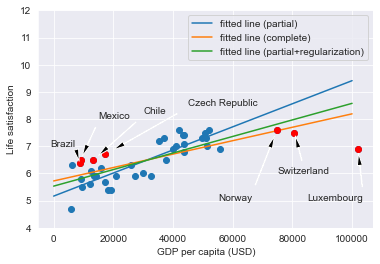

In [73]:
## same as previous plot
plt.scatter(country_stats.gdp_per_capita, country_stats.life_satisfaction)

X = np.linspace(start=0, stop=100000, num=1000)

## plot the fitted line based on partial dataset
plt.plot(X, t1*X + t0, label='fitted line (partial)')

## plot the fitted line of the complete dataset
plt.plot(X, t1full*X + t0full, label='fitted line (complete)')

## plot the fitted line based on partial dataset with regularization
plt.plot(X, t1ridge*X + t0ridge, label='fitted line (partial+regularization)')

## highlight the countries from the missing data
position_text2 = {
    "Brazil": (-1000, 7),
    "Mexico": (15000, 8),
    "Chile": (30000, 8.2),
    "Czech Republic": (45000, 8.5),
    "Norway": (55000, 5),
    "Switzerland": (75000, 6),
    "Luxembourg": (85000, 5)
}

for country, pos_text in position_text2.items():
    pos_data_x = country_stats.loc[country_stats.country==country,'gdp_per_capita']
    pos_data_y = country_stats.loc[country_stats.country==country,'life_satisfaction']
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.legend()
plt.ylim(4,12)
plt.show()

### Vary the regularization parameter $\alpha$

In [74]:
alphas = [10**i for i in range(20)]

In [75]:
Xsample = np.c_[sample_data.gdp_per_capita]
ysample = np.c_[sample_data.life_satisfaction]

In [76]:
%%time

from sklearn.metrics import mean_squared_error

rmses = []
r2s = []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(Xsample, ysample)
    ysample_predict = ridge.predict(Xsample)
    rmse = mean_squared_error(ysample, ysample_predict)
    r2 = ridge.score(Xsample,ysample)
    
    rmses.append(rmse)
    r2s.append(r2)

CPU times: user 17.7 ms, sys: 1.94 ms, total: 19.7 ms
Wall time: 18 ms


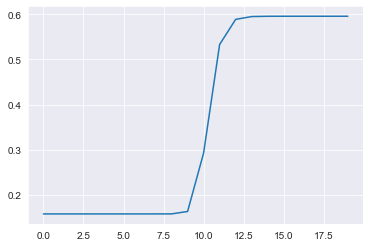

In [77]:
plt.plot(list(range(20)), rmses)
plt.show()

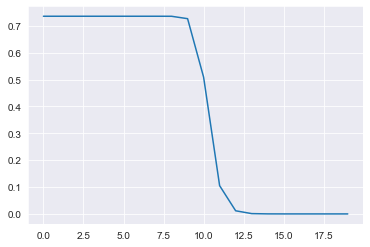

In [78]:
plt.plot(list(range(20)), r2s)
plt.show()

# Logistic Regression

The Logistic Regression model is typically used to fit/predict binary variable or variables with value between 0 and 1
$$
y = \sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n)}}
$$

$\sigma(z)$ is also called the `sigmoid` function, it has the following property

$$
\frac{d\sigma(z)}{dz} = \sigma(z)(1-\sigma(z))
$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)

Linear Regression vs. Logistic Regression:
![](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png)
![](https://saedsayad.com/images/LogReg_1.png)

**Example**
* We'll look at the Pima Indian Diabetes dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database
* We are going to predict diabetes using Logistic Regression Classifier

## Prepare the data

In [79]:
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, sep=',')
pima.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [80]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [81]:
X = pima[pima.columns[:-1]]
y = pima.Outcome

In [82]:
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [83]:
X.shape

(768, 8)

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Train-Test split

In [84]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

## Fit the model

In [85]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict values in test dataset
y_pred=logreg.predict(X_test)

/Users/xyin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

## Evaluate the model

In [87]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[127,  16],
       [ 31,  57]])

Text(0.5, 257.44, 'Predicted label')

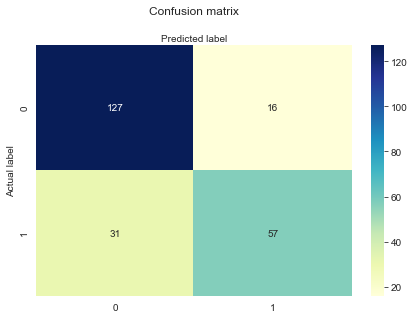

In [88]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7965367965367965
Precision: 0.7808219178082192
Recall: 0.6477272727272727


In [90]:
logreg.score(X_test, y_test) # also returns the accuracy

0.7965367965367965

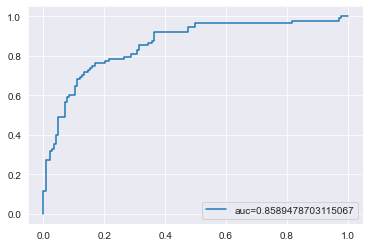

In [91]:
# ROC curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## More

In [92]:
logreg.intercept_, logreg.coef_

(array([-8.32928555]),
 array([[ 0.11775061,  0.03320448, -0.01149166,  0.00225231, -0.00169812,
          0.09841381,  0.74461539,  0.01093141]]))

In [93]:
pima.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


$$
p = \sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n)}}
$$

We could rewrite the relation to

$$
log(\frac{p}{1-p}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$

In [94]:
df_coef = pd.DataFrame({
    'feature': X.columns,
    'coef': logreg.coef_[0]
})

In [95]:
df_coef

,feature,coef
0,Pregnancies,0.117751
1,Glucose,0.033204
2,BloodPressure,-0.011492
3,SkinThickness,0.002252
4,Insulin,-0.001698
5,BMI,0.098414
6,DiabetesPedigreeFunction,0.744615
7,Age,0.010931
